<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Tarea integradora - Parte 2

En esta notebook trabajeremos con variables aleatorias contínuas y distribuciones de probabilidad conocidas. En lugar de la librería pandas, utilizaremos scipy que también implementa numerosas funciones útiles para proceso de datos numéricos.

## Ejercicio 1

Desarrollar analíticamente el tiempo de vida en horas que una computadora funciona antes de descomponerse es una v.a.
continua con f.d.p. dada por

$$
f ( x ) = \begin{cases}
~~ 0.01e^{-0.01x} & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

* Hallar la F.d.a. de X

* ¿Cuál es la probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse?

* ¿Cuál es la probabilidad que una computadora se descomponga antes de registrar 100 horas de uso?

### Solución

La F.d.a de la v.a. X está dada por:

$$
F ( x ) = \begin{cases}
~~ 1 - e^{-0.01x} & si ~~ x ≥ 0 \\
~~ 0 & si ~~ x<0
\end{cases}
$$

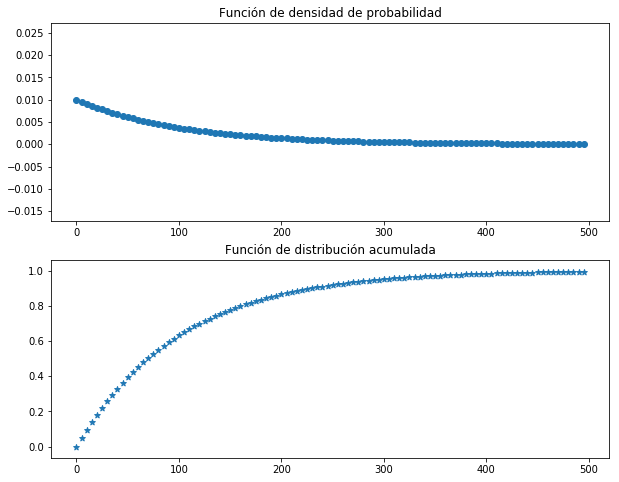

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['figure.figsize'] = 10, 8
from scipy.stats import expon

distribucion = expon(scale=100)
f = distribucion.pdf
F = distribucion.cdf
x=np.arange(0, 500, 5)

plt.subplot(211)
matplotlib.pyplot.scatter(x,f(x))
plt.title('Función de densidad de probabilidad')
plt.subplot(212)
matplotlib.pyplot.scatter(x,F(x),marker = '*')
plt.title('Función de distribución acumulada')

plt.show()

Con esta F.d.a la probabilidad de que la computadora funcione entre 50 y 150 horas antes de descomponerse es de:

$$
F ( 50 ) + 1 - F ( 150 )  = 1 - e^{-0.01*50} + 1 - ( 1 - e^{-0.01*150}) = 1 - e^{-0.01*50} + e^{-0.01*150} = 1 - e^{-0.5} + e^{-1.5}
$$

In [23]:
F(50) + 1 - F(150)

0.6165995004357964

Para calcular la probabilidad de que una computadora se descomponga antes de registrar 100 horas de uso, se lo puede pensar como el complemento de que la computadora funcione al menos 100 horas antes de descomponerse:

$$
1 - F ( 100 )  = 1 - (1 - e^{-0.01*100}) = e^{-0.01*100} = e^{-1} 
$$

In [24]:
F(100)

0.6321205588285577

## Ejercicio 2

Modificar los valores de mu, sigma y el rango de la siguiente distribución normal. Escribir un breve resumen sobre como se relacionan estas variables sobre el dibujo de la campana de Gauss.

In [12]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

# Define parameters for normal distribution.
mu = 5
sigma = 2
rng = range(-20,30)

In [13]:
def graphic_normal(mu, sigma, rng, n_examples=10000):
    # Generate normal distribution with given mean and standard deviation.
    dist = norm(mu, sigma)

    plt.figure(figsize=(10,8))
    plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
    plt.title('Probability density function of normal distribution')


    # Plot probability density function and of this distribution.
    plt.subplot(312)
    plt.plot(rng, dist.cdf(rng))
    plt.title('Cumulutative distribution function of normal distribution')

    # Draw 1000 samples from the random variable.
    sample = dist.rvs(size=n_examples)

    print("Sample descriptive statistics:")
    print(pd.DataFrame(sample).describe())

    # Plot a histogram of the samples.
    plt.subplot(313)
    plt.hist(sample, bins=100, normed=True)
    plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
    plt.title('{} random samples from normal distribution'.format(n_examples))

    plt.tight_layout()  # Make space for titles 

Sample descriptive statistics:
                  0
count  10000.000000
mean       4.992160
std        1.986833
min       -2.258772
25%        3.641416
50%        5.003798
75%        6.341768
max       11.981866


/home/gonzigaran/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


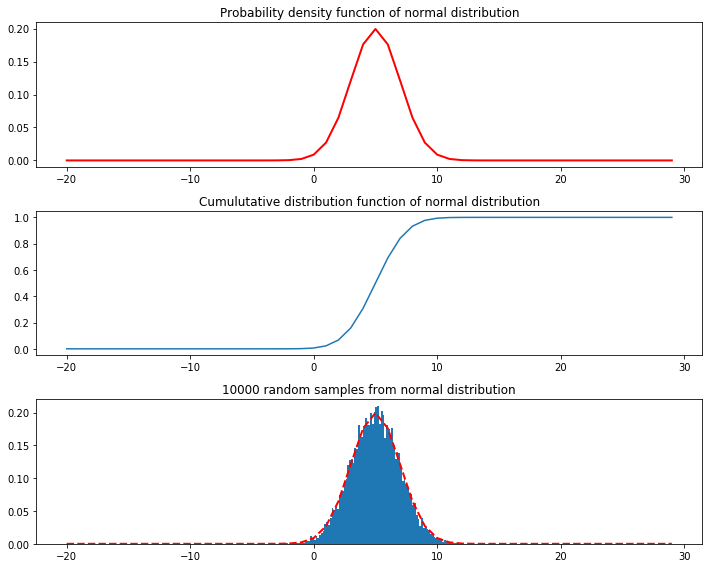

In [14]:
graphic_normal(mu, sigma, rng)

En la distribución normal el valor de mu (esperanza) se puede interpretar gráficamente como el eje de simetría de la campana, el valor de sigma se puede interpretar gráficamente como el ancho de la campana 